In [1]:
import tensorflow as tf


weight_decay = 1e-5


def conv_block(nb_filter, kernel_size, stride=(1, 1)):
    def f(input):
        conv = tf.keras.layers.Conv2D(
            nb_filter,
            kernel_size,
            strides=stride,
            padding="same",
            use_bias=False,
        )(input)
        norm = tf.keras.layers.BatchNormalization()(conv)
        act = tf.keras.layers.Activation("relu")(norm)

        return act

    return f


def FCRN_A_base(input):
    kernel_size = (3, 3)
    block_1 = conv_block(32, kernel_size)(input)
    pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(block_1)

    block_2 = conv_block(64, kernel_size)(pool_1)
    pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(block_2)

    block_3 = conv_block(128, kernel_size)(pool_2)
    pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(block_3)

    block_4 = conv_block(512, kernel_size)(pool_3)
    up_5 = tf.keras.layers.UpSampling2D(size=(2, 2))(block_4)
    block_5 = conv_block(128, kernel_size)(up_5)

    up_6 = tf.keras.layers.UpSampling2D(size=(2, 2))(block_5)
    block_6 = conv_block(64, kernel_size)(up_6)

    up_7 = tf.keras.layers.UpSampling2D(size=(2, 2))(block_6)
    block_7 = conv_block(32, kernel_size)(up_7)
    return block_7

In [2]:
def build_Model_FCRN_A(input_dim):
    input_ = tf.keras.layers.Input(shape=(input_dim))
    activation = FCRN_A_base(input_)
    density_pred = tf.keras.layers.Conv2D(
        1,
        (1, 1),
        use_bias=False,
        activation="sigmoid",
        kernel_initializer="orthogonal",
        name="pred",
        padding="same",
    )(activation)

    model = tf.keras.models.Model(inputs=input_, outputs=density_pred)
    model.compile(optimizer="adam", loss="mse")

    return model

In [102]:
model = build_Model_FCRN_A((256, 256, 1))

In [103]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 32)      288       
_________________________________________________________________
batch_normalization_21 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
activation_21 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      18432     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128, 128, 64)      256 

In [104]:
import cv2

In [105]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

In [106]:
def display_img(img):
    fig, ax = plt.subplots(figsize=(10, 20));
    plt.imshow(img, cmap="gray");

In [107]:
import os
os.getcwd()

'C:\\Users\\mojt\\Code\\cartridge_counting\\cartridge_counting\\research'

In [108]:
image = '../data/labelled_black_caps/1.jpg'

In [109]:
orig_img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
circles = np.load('../data/labelled_black_caps/1.npy')

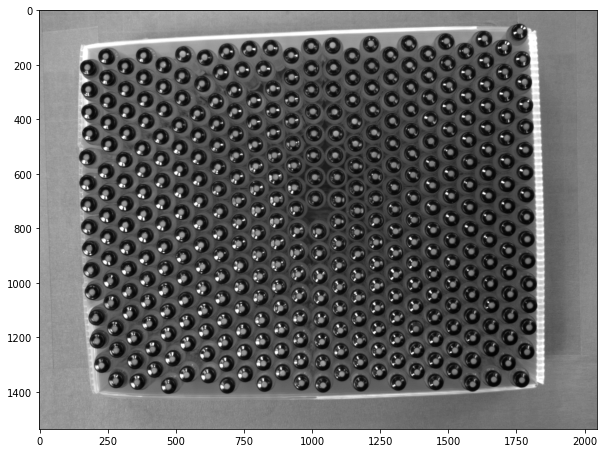

In [110]:
display_img(orig_img)

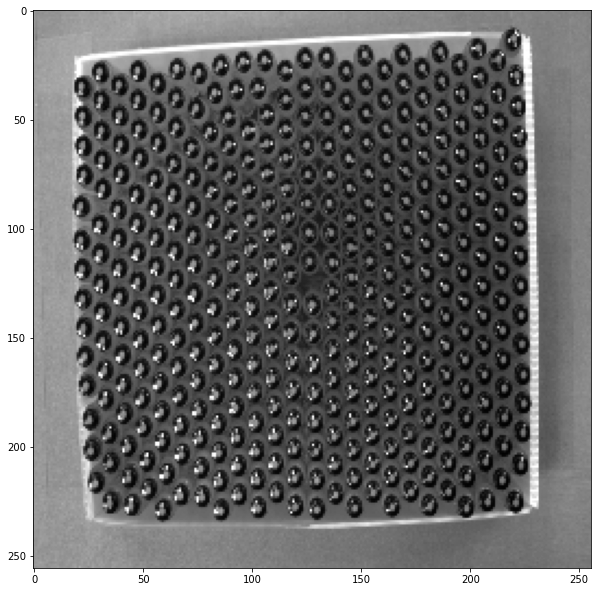

In [121]:
display_img(cv2.resize(orig_img, (256, 256)))

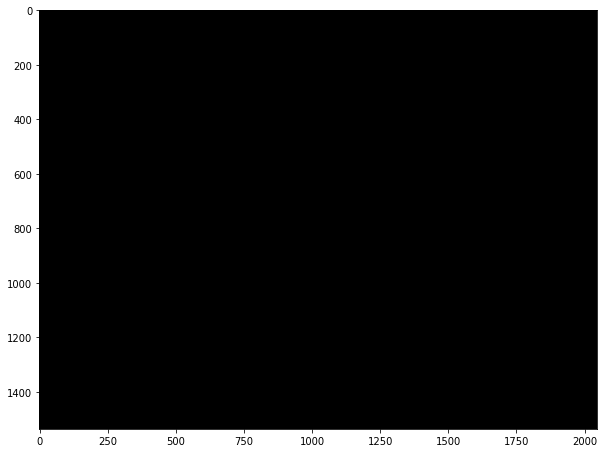

In [113]:
display_img(image)

In [190]:
width = 10
image = np.zeros(orig_img.shape, np.uint8)
for no, i in enumerate(circles[0, :]):
    image[int(i[1])-width:int(i[1])+width, int(i[0])-width:int(i[0])+width] = 100
# width = 1
# image = np.zeros(orig_img.shape, np.uint8)
# for no, i in enumerate(circles[0, :]):
#     image[int(i[1]), int(i[0])] = 255

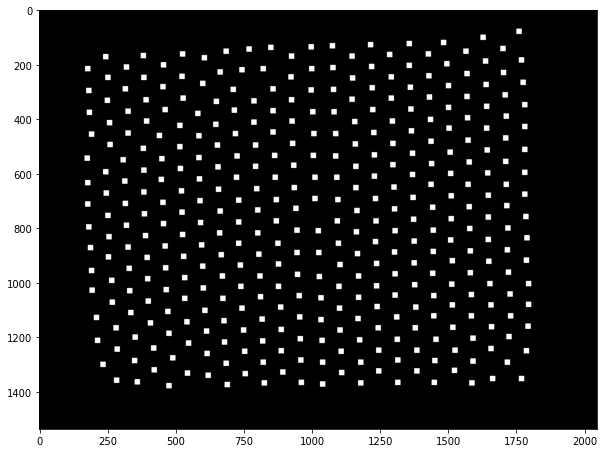

In [191]:
display_img(image)

In [193]:
resized_image = cv2.resize(image, (256, 256))

In [198]:
num_labels, labelled_image = cv2.connectedComponents(resized_image)

In [212]:
width = 1
image = np.zeros((256, 256), np.uint8)
orig_width, orig_height = orig_img.shape
new_width , new_height = (256, 256)
new_centers = []
for no, (y, x, _) in enumerate(circles[0, :]):
    x_new, y_new = (x / orig_width) * new_width, (y / orig_height) * new_height
    new_centers.append((x_new, y_new))
    image[int(x_new), int(y_new)] = 255

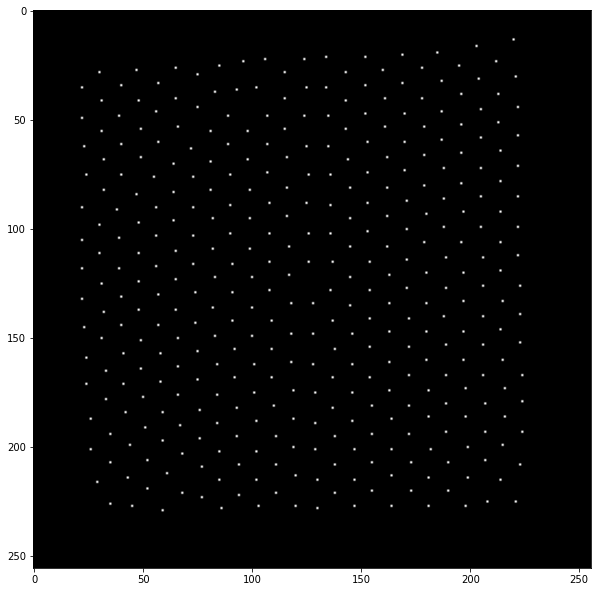

In [213]:
display_img(image)

In [160]:
# width = 1
# image = np.zeros(orig_img.shape, np.uint8)
# for no, i in enumerate(circles[0, :]):
#     image[int(i[1]), int(i[0])] = 255

In [237]:
gaussian_blur_kernel = (1, 1)
blurred_img = cv2.GaussianBlur(image, gaussian_blur_kernel, 1, 1)

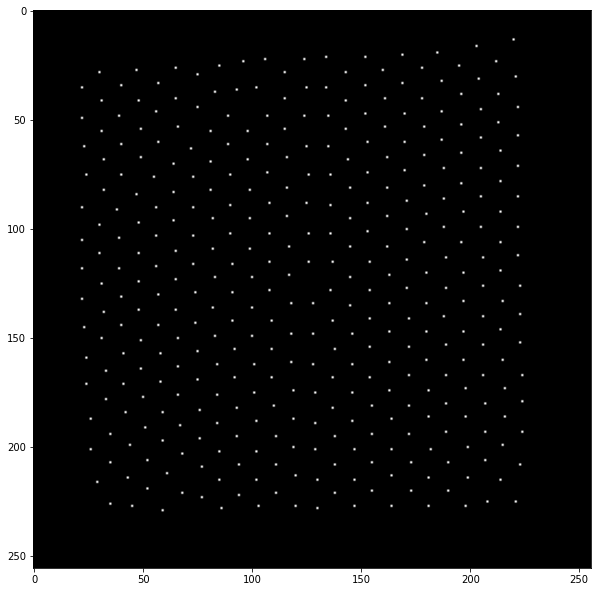

In [238]:
display_img(blurred_img)

In [235]:
image.sum() / 255

373.0

In [236]:
blurred_img.sum() / 255

371.5372549019608

In [116]:
new_size = (256, 256)

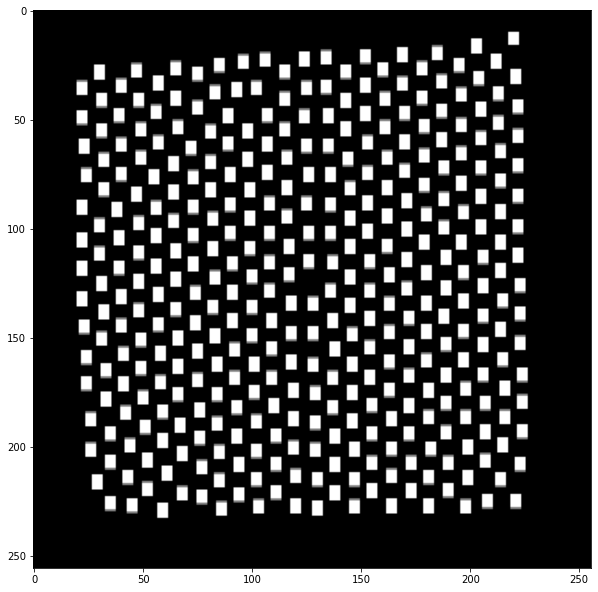

In [117]:
display_img(cv2.resize(image, new_size))

In [216]:
resized_image = cv2.resize(orig_img, new_size)

In [227]:
alpha = 0.5
res = cv2.addWeighted(
            resized_image,
            alpha,
            blurred_img,
            1 - alpha,
            0,
        )

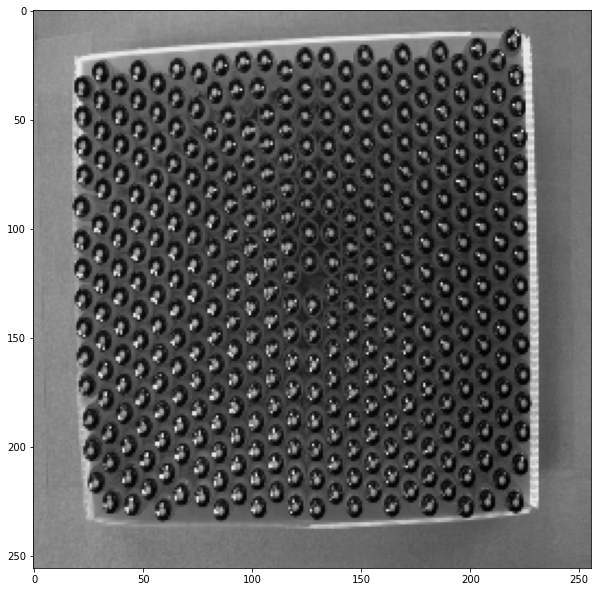

In [228]:
display_img(res)

In [60]:
orig_img.shape

(1536, 2048)

In [62]:
1536 / 256

6.0

In [63]:
2048 / 6

341.3333333333333

In [83]:
cv2.resize(image, (342, 256)).sum() / 373

1022.0804289544236

In [80]:
image.sum() / (373 * 255)

144.0

In [79]:
13696560 / (12 * 12 * 255)

373.0

In [130]:
!pip install scikit-image
import skimage

  Using cached scikit_image-0.17.2-cp37-cp37m-win_amd64.whl (11.5 MB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)


In [141]:
res = skimage.measure.block_reduce(image, (5,5), np.max)

In [142]:
import skimage.measure

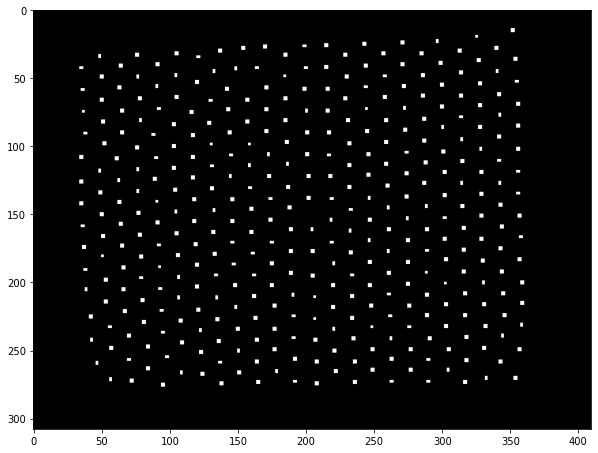

In [143]:
display_img(res)